# <center> EDA ON CUISINE RATING DATASET

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Cuisine_rating.csv')
data

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
data.shape

(200, 15)

In [6]:
data.rename(columns={'Alcohol ':'Alcohol','Food Rating':'Food_Rating','Service Rating':'Service_Rating','Overall Rating':'Overall_Rating','Often A S':'OftenAs'},inplace=True)

In [7]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food_Rating       0.0
Service_Rating    0.0
Overall_Rating    0.0
OftenAs           0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

In [9]:
data['Age']=[(2022-YOB)for YOB in data['YOB'] ]
data.head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,OftenAs,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27


### Dropping the unwanted columns

In [10]:
data.drop(columns=['User ID','Area code','YOB'],inplace=True)

## UNIVARIATE ANALYSIS

### Histogram

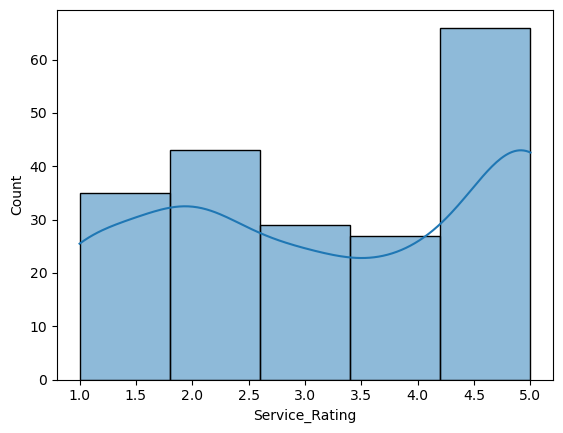

In [11]:
sns.histplot(data=data,x='Service_Rating',bins=5,kde=True)
plt.show()

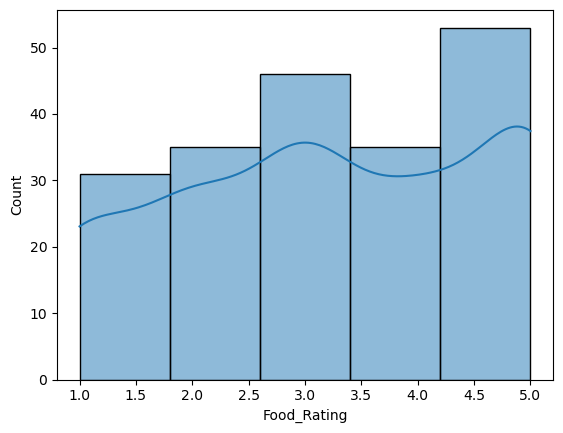

In [12]:
sns.histplot(data=data,x='Food_Rating',bins=5,kde=True)
plt.show()

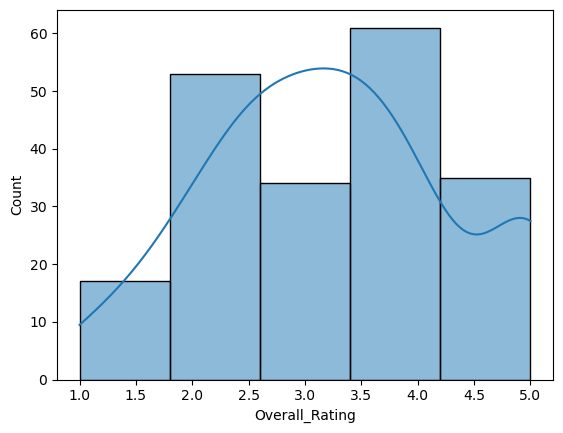

In [13]:
sns.histplot(data=data,x='Overall_Rating',bins=5,kde=True)
plt.show()

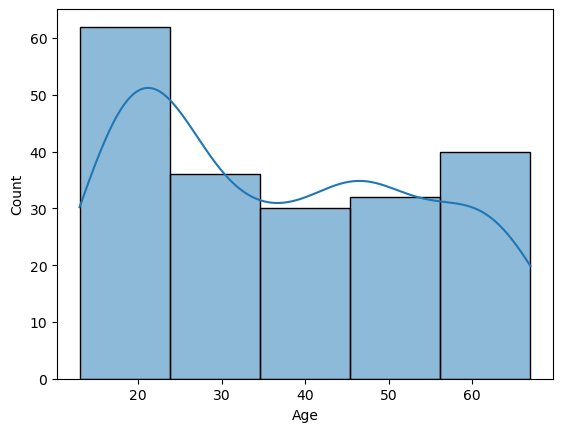

In [14]:
sns.histplot(data=data,x='Age',bins=5,kde=True)
plt.show()

### Boxplot

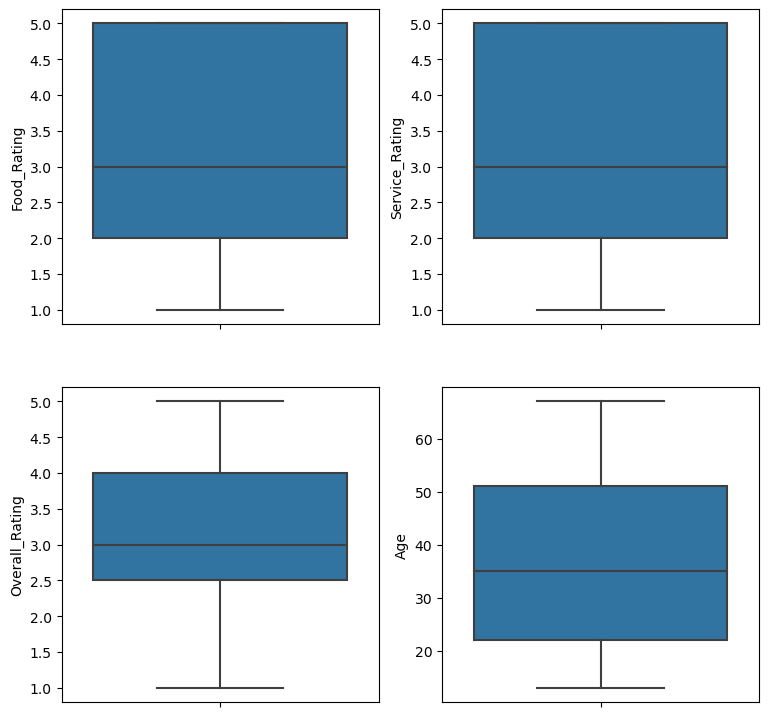

In [15]:
plt.figure(figsize=(9,9))

plt.subplot(2,2,1)
sns.boxplot(data=data,y='Food_Rating')

plt.subplot(2,2,2)
sns.boxplot(data=data,y='Service_Rating')

plt.subplot(2,2,3)
sns.boxplot(data=data,y='Overall_Rating')

plt.subplot(2,2,4)
sns.boxplot(y='Age', data=data)

plt.show()

In [16]:
data.columns

Index(['Location', 'Gender', 'Marital Status', 'Activity', 'Budget',
       'Cuisines', 'Alcohol', 'Smoker', 'Food_Rating', 'Service_Rating',
       'Overall_Rating', 'OftenAs', 'Age'],
      dtype='object')

## MULTIVARIATE ANALYSIS

### Count plot

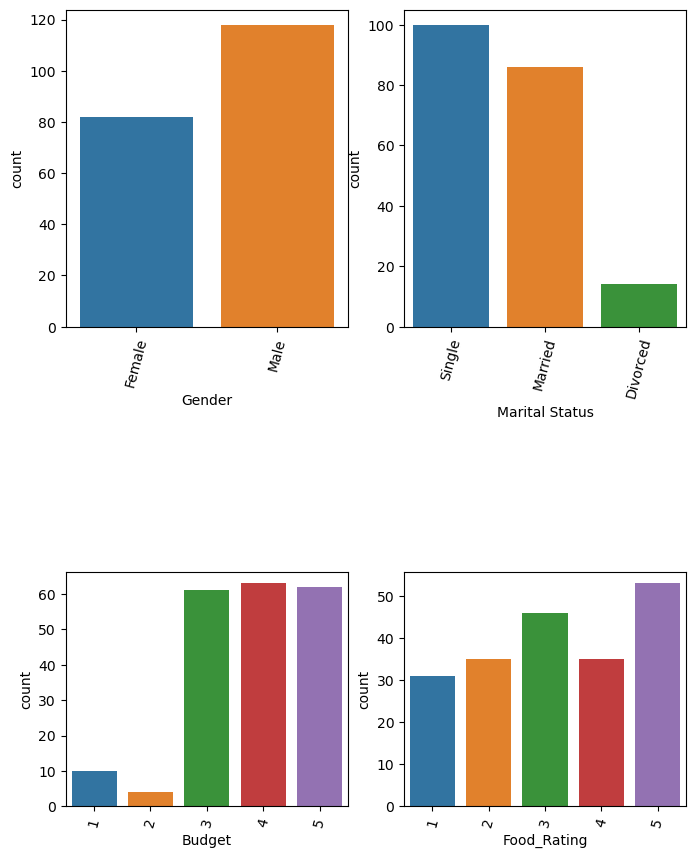

In [17]:
plt.figure(figsize=(8,14))

plt.subplot(3,2,1)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Gender')

plt.subplot(3,2,2)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Marital Status')

plt.subplot(3,2,3)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Cuisines')

plt.subplot(3,2,4)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Activity')

plt.subplot(4,2,5)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Budget')

plt.subplot(4,2,6)
plt.xticks(rotation=75)
sns.countplot(data=data,x='Food_Rating')


plt.show()

### Creating a custom function to filter out location wise datasets

In [18]:
 def sort_Location(location):
    data_location=data[data.Location==location]
    data_location.drop(columns='Location',inplace=True)
    return data_location

In [19]:
CentralParkNY=sort_Location('Central Park,NY')
CentralParkNY

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,OftenAs,Age
4,Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
9,Male,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27
18,Male,Single,Student,3,Filipino,Socially,Socially,3,5,4.0,No,21
19,Male,Married,Student,4,Seafood,Often,Never,3,1,2.0,No,63
26,Female,Single,Student,3,Indian,Never,Socially,2,3,2.5,No,21
34,Male,Divorced,Student,1,Japanese,Socially,Often,5,5,5.0,No,21
40,Male,Single,Student,2,Seafood,Often,Never,2,2,2.0,No,21
43,Male,Single,Student,3,French,Never,Often,4,1,2.5,No,22
60,Female,Single,Student,4,Japanese,Never,Never,4,3,3.5,No,19
64,Female,Single,Student,4,Italian,Never,Never,5,5,5.0,No,26


## Bar Plot

In [20]:
CuisineFood=CentralParkNY.groupby(['Cuisines'])['Food_Rating'].mean()
CuisineFood

Cuisines
Chinese     4.500000
Filipino    2.333333
French      4.500000
Indian      2.000000
Italian     5.000000
Japanese    4.250000
Seafood     2.500000
Name: Food_Rating, dtype: float64

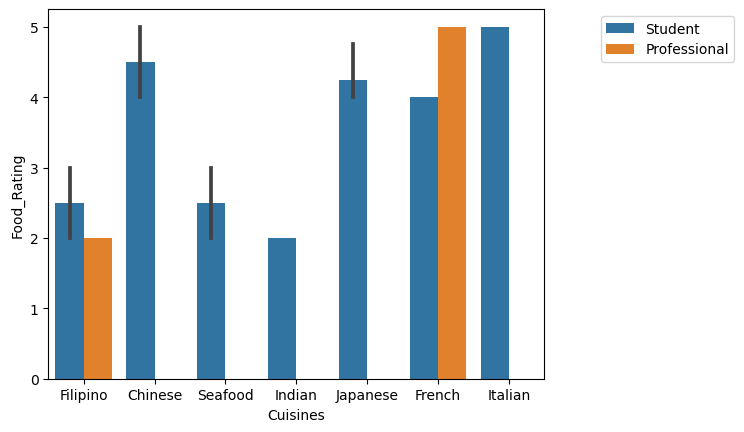

In [21]:
sns.barplot(data=CentralParkNY,x='Cuisines',y='Food_Rating',hue='Activity')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

#### Here the Italian Cuisines got the best food rating by students and French Cuisines got the best rating by Professionals

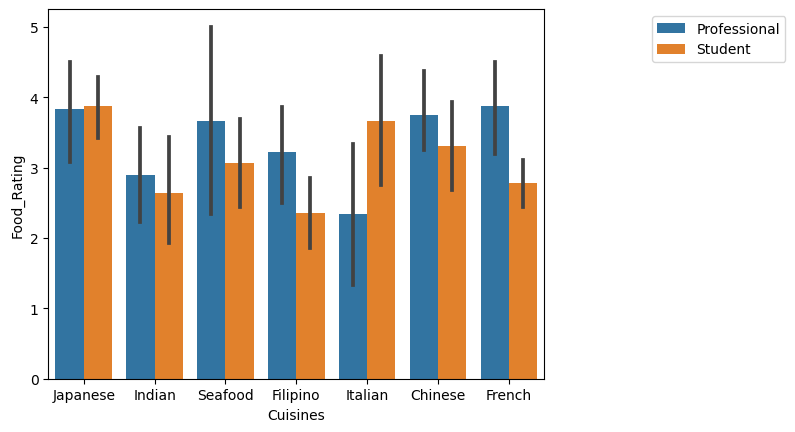

In [22]:
sns.barplot(data=data,x='Cuisines',y='Food_Rating',hue='Activity')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

#### Here we can see that the French Cuisines got more rating by professionals and Japanese Cuisines got the best rating by Students.

### Creating a custom function to filter out location wise datasets

In [23]:
def sort_Location(location):
    data_location=data[data.Location==location]
    data_location.drop(columns='Location',inplace=True)
    return data_location

In [24]:
George=sort_Location('St. George,NY')
George

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,OftenAs,Age
1,Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
10,Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
11,Male,Married,Student,4,Chinese,Never,Socially,3,1,2.0,No,59
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
37,Female,Single,Student,5,French,Never,Never,3,2,2.5,No,32
39,Male,Single,Student,4,Filipino,Never,Never,3,1,2.0,No,36
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
44,Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53


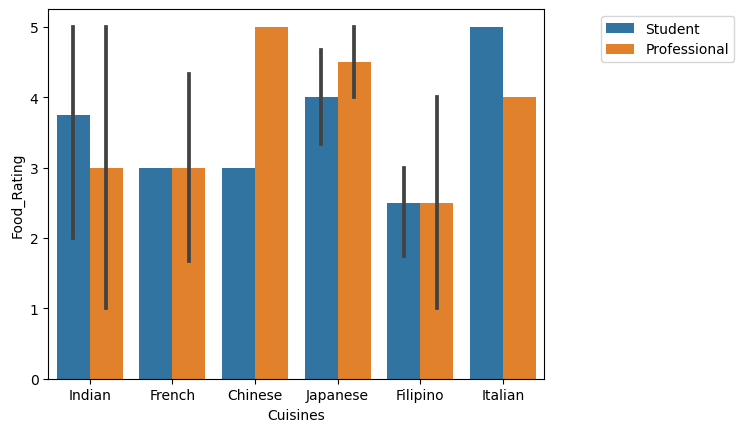

In [25]:
sns.barplot(data=George,x='Cuisines',y='Food_Rating',hue='Activity')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

### Line chart

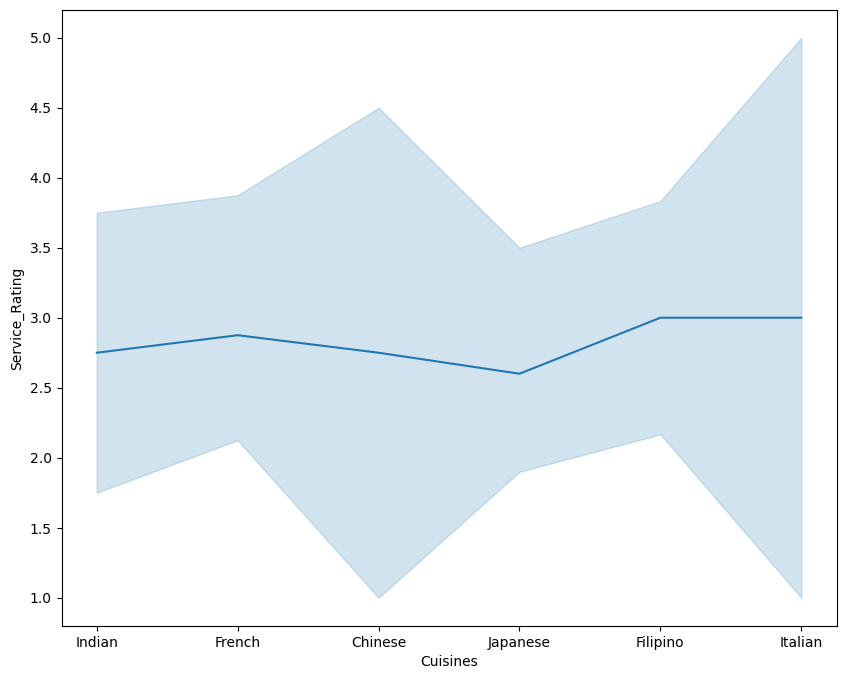

In [26]:
plt.figure(figsize=(10,8))
plt.xlabel('Cuisines')
plt.ylabel('Service_Rating')
sns.lineplot(data=George,x='Cuisines',y='Service_Rating')
plt.show()

#### In the place George,the best service rating got the italian restuarent and japenese restaurant  has the lowest servicing rate.

### Catplot

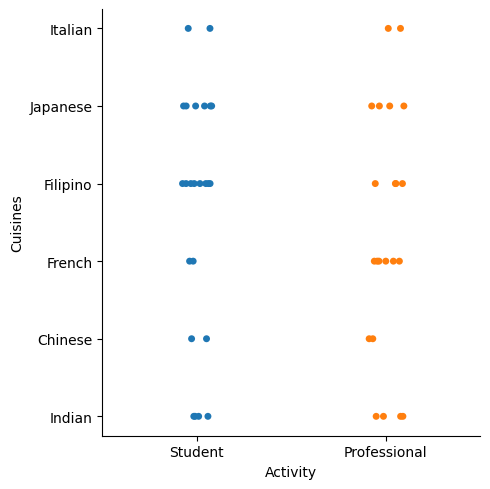

In [27]:
sns.catplot(data=George,x='Activity',y='Cuisines')
plt.show()

#### From the above plot it is clear that mostly  the students go for Indian,Filpino and Japanese Cuisines and the Professionals go for indian and French Cuisines.

### Reg plot

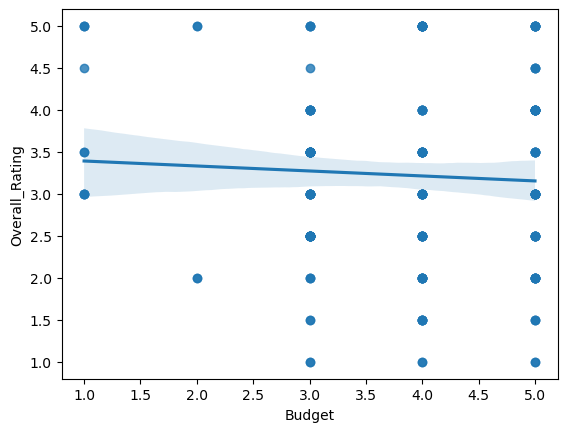

In [28]:
sns.regplot(data=data,x='Budget',y='Overall_Rating')
plt.show()

##### There is no correlation between budget and overall rating.

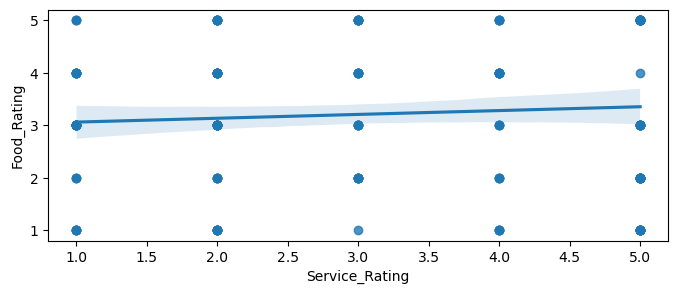

In [29]:
plt.figure(figsize=(8,3))
sns.regplot(data=data,x='Service_Rating',y='Food_Rating')
plt.show()

#### There is no correlation between Food Rating and Service Rating.

### Heat Map

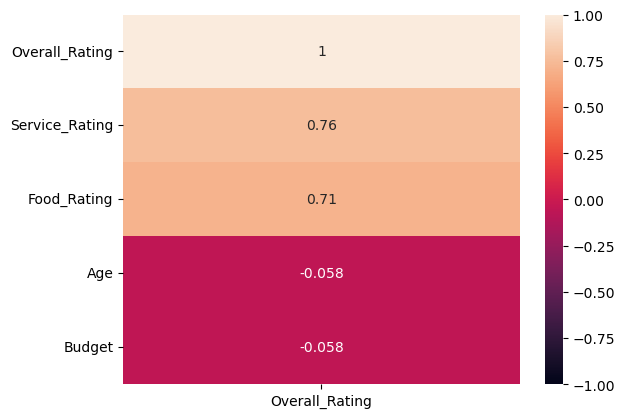

In [30]:
sns.heatmap(data.corr()[['Overall_Rating']].sort_values(by='Overall_Rating',ascending=False),vmax=1,vmin=-1,annot=True);

### There is no correlation between budget and age with overall rating.And service rating and food rating have moderate correlation with overall rating.


In [31]:
def sort_Cuisines(kitchen):
    data_kitchen=data[data.Cuisines==kitchen]
    data_kitchen.drop(columns='Cuisines',inplace=True)
    return data_kitchen

In [32]:
kitchen=sort_Cuisines('Indian')
kitchen


,Location,Gender,Marital Status,Activity,Budget,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,OftenAs,Age
1,"St. George,NY",Female,Married,Student,3,Never,Socially,1,1,1.0,No,31
6,"China Town, NY",Female,Married,Professional,5,Often,Socially,1,4,2.5,No,45
20,"St. George,NY",Female,Single,Student,3,Socially,Often,5,3,4.0,No,13
24,"Central Park,ny",Male,Single,Professional,3,Socially,Socially,2,5,3.5,No,59
26,"Central Park,NY",Female,Single,Student,3,Never,Socially,2,3,2.5,No,21
27,"China Town, NY",Male,Single,Student,5,Never,Never,1,5,3.0,No,22
31,"Market City, MY",Male,Married,Student,1,Never,Often,4,2,3.0,No,51
32,"Upper West Side,NY",Male,Single,Professional,3,Often,Never,3,2,2.5,No,27
33,"Central Park,ny",Female,Single,Professional,5,Socially,Socially,1,5,3.0,No,13
67,"Market City, NY",Male,Married,Professional,3,Never,Often,5,2,3.5,No,22


### Pie Chart

In [33]:
data.OftenAs.value_counts().index

Index(['No', 'Yes'], dtype='object')

In [38]:
palette_color=sns.color_palette('spring')

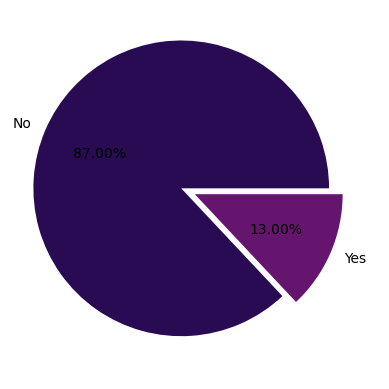

In [36]:
plt.pie(data=kitchen,x=data.OftenAs.value_counts(),explode=[0.1,0],colors=palette_color,labels=['No','Yes'],autopct='%0.2f%%');